### define a normalizing function

In [43]:
def normalize(df):
    x = df.values.reshape(-1, 1) #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled).apply(lambda x: x*100)

## nbody

In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

nbody = pd.read_csv('nbody.csv')
nbody

,occupancy,block_size,grid_size,threads,waves_per_SM,instructions,ipc,warp_cycles_per_instruction,active_warps_per_scheduler,no_eligible_warp,l1_hit,l2_hit
0,6.25,32,272,8704,0.25,1378917872,0.12,16.44,1.00,93.92,99.89,95.06
1,12.50,64,272,17408,0.25,5485181920,0.24,16.43,1.14,93.05,99.95,97.47
2,24.86,128,272,34816,0.50,21879748544,0.46,16.62,1.99,88.03,99.23,98.60
3,49.37,256,272,69632,1.00,87397035904,0.75,19.45,3.95,76.69,82.90,99.02
4,98.97,512,272,139264,2.00,349344231040,0.52,55.50,7.93,85.72,58.36,91.83


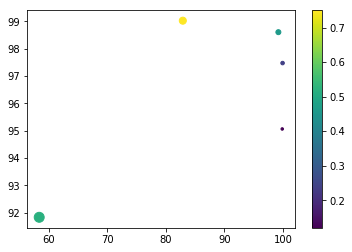

In [46]:
# colorbar: instruction per cycle - performance metric
# size: occupancy
# x-axis: L1 hit
# y-axis: L2 hit

plt.scatter(nbody['l1_hit'], nbody['l2_hit'], c=nbody['ipc'], s=nbody['occupancy'], alpha=1,
            cmap='viridis')
plt.colorbar();  

## Monte Carlo

In [47]:
mc = pd.read_csv('monteCarlo.csv')
mc

,occupancy,block_size,grid_size,threads,waves_per_SM,instructions,ipc,warp_cycles_per_instruction,active_warps_per_scheduler,no_eligible_warp,l1_hit,l2_hit
0,37.13,512,2720,1392640,40.0,19529034824,0.75,15.67,3.41,78.26,99.72,96.55
1,38.27,256,2720,696320,20.0,9193182772,0.78,15.61,3.20,79.51,99.74,96.74
2,41.27,128,2720,348160,10.0,4025909546,0.84,15.58,3.32,78.72,99.67,96.75
3,43.15,64,2720,174080,5.0,1870167013,0.88,15.56,3.47,77.69,99.66,97.10
4,42.45,32,2720,87040,2.5,792461252,0.85,15.56,3.41,78.06,99.55,97.00


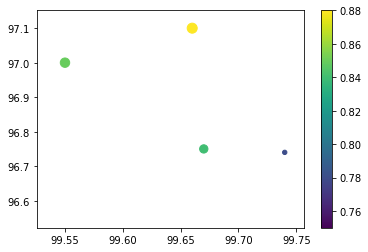

In [52]:
# colorbar: instruction per cycle - performance metric
# size: occupancy
# x-axis: L1 hit
# y-axis: L2 hit

occ = normalize(mc['occupancy'])

plt.scatter(mc['l1_hit'], mc['l2_hit'], c=mc['ipc'], s=occ, alpha=1,
            cmap='viridis')

plt.colorbar();  

## Jacobi

In [56]:
jacobi = pd.read_csv('jacobi.csv')
jacobi

,occupancy,block_size,waves_per_SM,ipc,warp_cycles_per_instruction,no_eligible_warp,l1_hit,l2_hit
0,97.25,1024,0.97,0.44,60.21,86.96,63.82,92.97
1,46.44,512,0.49,0.63,20.72,81.08,84.60,98.54
2,23.13,256,0.24,0.38,17.37,88.64,97.45,98.98
3,11.76,128,0.12,0.20,17.45,94.26,96.40,96.54
4,6.04,64,0.06,0.10,17.68,94.34,95.64,84.86
5,3.12,32,0.06,0.05,18.02,94.45,93.65,69.29


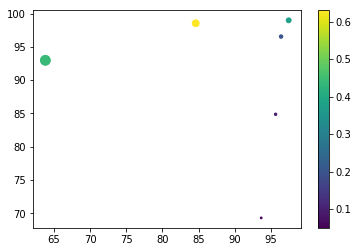

In [57]:
# colorbar: instruction per cycle - performance metric
# size: occupancy
# x-axis: L1 hit
# y-axis: L2 hit

plt.scatter(jacobi['l1_hit'], jacobi['l2_hit'], c=jacobi['ipc'], s=jacobi['occupancy'], alpha=1,
            cmap='viridis')
plt.colorbar();  

## bar + line plot 

In [113]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

def plot(labels, df, l1):
    x = np.arange(len(labels))                                             

    width = 0.20        
    fig, ax = plt.subplots()   

    def autolabel(rects): 
         """Attach a text label above each bar in *rects*, displaying its h
     eight.""" 
         for rect in rects: 
             height = rect.get_height() 
             ax.annotate('{}'.format(height), 
                         xy=(rect.get_x() + rect.get_width() / 2, height), 
                         xytext=(0, 3),  # 3 points vertical offset 
                         textcoords="offset points", 
                         color='r',
                         ha='center', va='bottom') 

    rects1 = ax.bar(labels, df['occupancy'], color='r', label='occupancy', width=0.4)
    ax.plot(labels, df['l2_hit'], color='g', label='L2 hit')
    ax.legend()
    ax.set_ylabel('Occupancy & L2-hit rate')   
    ax2 = ax.twinx() 
    ax2.set_ylabel('IPC', color='b') 
    ax2.plot(labels, df['ipc'], color='b', label='IPC')      
    if l1: 
        ax2.plot(labels, df['l1_hit'], color='y', label='L1 hit')
    ax.set_title('Occupancy')    
    ax2.tick_params(axis='y', labelcolor='b') 
    plt.grid(color='g', linestyle='--', linewidth=0.5) 
    ax2.legend(loc='upper center') # relocate legend box 
    autolabel(rects1) 
    plt.show()

## Binomial Options

In [95]:
bo = pd.read_csv('binomial.csv')
bo

,occupancy,block_size,waves_per_SM,ipc,warp_cycles_per_instruction,no_eligible_warp,l1_hit,l2_hit
0,6.25,32,1.6,0.19,20.33,95.09,0,95.46
1,12.49,64,1.6,0.30,26.39,92.42,0,97.56
2,24.98,128,3.2,0.52,29.89,86.68,0,98.91
3,49.95,256,6.4,0.99,31.45,75.07,0,99.23
4,98.59,512,12.8,1.37,45.27,65.17,0,97.18
5,99.64,1024,25.6,1.38,45.29,64.84,0,98.81


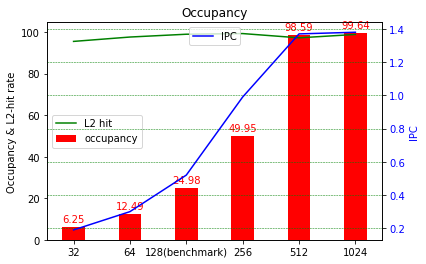

In [110]:
labels = ['32', '64', '128(benchmark)', '256', '512', '1024']

plot(labels, bo, False)

## Black Scholes

In [97]:
bs = pd.read_csv('blackScholes.csv')
bs

,occupancy,block_size,waves_per_SM,ipc,warp_cycles_per_instruction,no_eligible_warp,l1_hit,l2_hit
0,49.73,32,97.66,0.73,43.38,81.44,0,77.36
1,95.78,64,48.83,0.80,77.86,79.42,0,69.57
2,95.22,128,48.83,0.82,73.49,79.54,0,69.52
3,93.93,256,48.83,0.79,75.29,80.18,0,69.89
4,93.52,512,48.84,0.79,75.53,79.91,0,70.32
5,91.26,1024,48.85,0.78,76.46,79.24,0,70.61


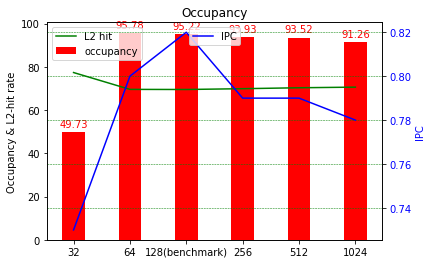

In [111]:
labels = ['32', '64', '128(benchmark)', '256', '512', '1024']

plot(labels, bs, False)

## quasirand

In [100]:
qr = pd.read_csv('quasirand.csv')
qr

,occupancy,block_size,waves_per_SM,ipc,warp_cycles_per_instruction,no_eligible_warp,l1_hit,l2_hit
0,28.77,96,0.30,1.02,17.23,73.13,0,96.31
1,55.18,192,0.64,1.24,24.43,63.01,0,93.95
2,75.65,384,1.28,1.22,33.60,64.47,0,91.20
3,68.06,768,3.20,1.34,28.99,62.70,0,94.97
4,75.25,960,1.60,1.18,32.55,62.08,0,89.96


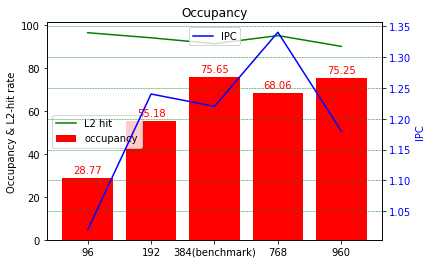

In [103]:
labels = ['96', '192', '384(benchmark)', '768', '960']
plot(labels, qr, False)

## fast walsh tranformation

In [102]:
fwt = pd.read_csv('fastWalsh.csv')
fwt

,occupancy,block_size,waves_per_SM,ipc,warp_cycles_per_instruction,no_eligible_warp,l1_hit,l2_hit
0,78.55,128,51.20,1.18,42.22,70.38,0,49.64
1,80.61,256,51.20,1.18,43.48,70.49,0,50.05
2,81.09,512,45.08,1.14,45.08,71.18,0,50.06
3,76.35,1024,51.20,0.98,49.46,74.90,0,50.07


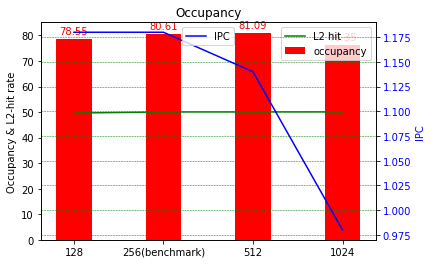

In [106]:
labels = ['128', '256(benchmark)', '512', '1024']

plot(labels, fwt, False)

## Monte Carlo Line + Bar

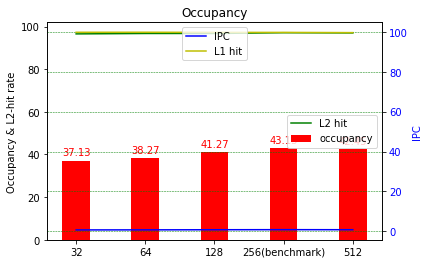

In [114]:
labels = ['32', '64', '128', '256(benchmark)', '512']
plot(labels, mc, True)

## nbody Line + Bar

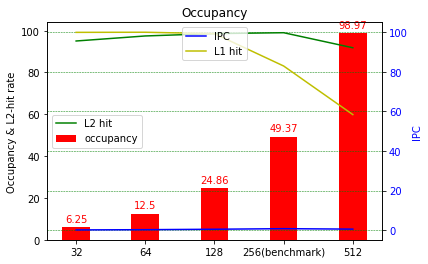

In [117]:
labels = ['32', '64', '128', '256(benchmark)', '512']
plot(labels, nbody, True)

## jacobi Line + Bar

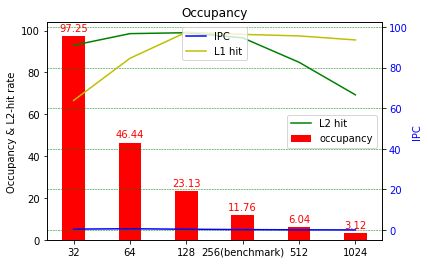

In [119]:
labels = ['32', '64', '128', '256(benchmark)', '512', '1024']
plot(labels, jacobi, True)